In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/African_crises_dataset.csv')
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
data = df.copy

In [6]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=932888ab0d68d3426e5d78dbfcda295869e02866ad061377caf355ba52cfd5e9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
data = pd.read_csv('/content/African_crises_dataset.csv')

data.head()

from ydata_profiling import ProfileReport

data = pd.read_csv('/content/African_crises_dataset.csv')

profile = ProfileReport(data, title='Pandas Profiling Report for African Crises')

profile.to_notebook_iframe()

profile.to_file("your_report_name.html")

Output hidden; open in https://colab.research.google.com to view.

In [9]:
data.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [10]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print('Numerical Data Values')
display(num.head())
print('Categorical Data Values')
display(cat.head())

Numerical Data Values


,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


Categorical Data Values


,country_code,country,banking_crisis
0,DZA,Algeria,crisis
1,DZA,Algeria,no_crisis
2,DZA,Algeria,no_crisis
3,DZA,Algeria,no_crisis
4,DZA,Algeria,no_crisis


In [11]:
from sklearn.preprocessing import LabelEncoder
encoded = {}
for i in cat.columns:
    encoder = LabelEncoder()
    data[i] = encoder.fit_transform(data[i])
    encoded[i + '_encoder'] = encoder
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

encoded

{'country_code_encoder': LabelEncoder(),
 'country_encoder': LabelEncoder(),
 'banking_crisis_encoder': LabelEncoder()}

In [12]:
num.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler
toBeScaled = ['inflation_annual_cpi']
scaling = {}
# .......... Instantiate your algorithm(Instantiation)

for i in toBeScaled:
    scaler = StandardScaler()
    data[i] = scaler.fit_transform(data[[i]])
    scaling[i + '_scaler'] = scaler
    joblib.dump(scaler, open(f'{i}_scaling.pkl', 'wb'))

scaling

{'inflation_annual_cpi_scaler': StandardScaler()}

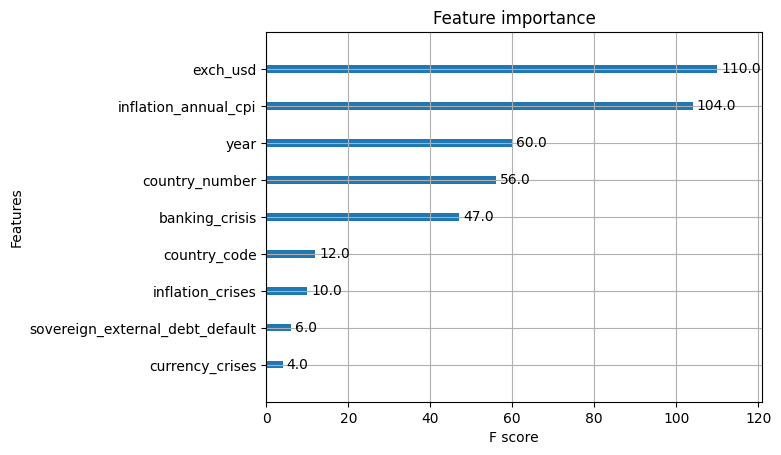

In [14]:
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('systemic_crisis', axis = 1)
y = data['systemic_crisis']

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)
plt.show()

In [15]:
sel_cols = ['exch_usd', 'inflation_annual_cpi', 'year', 'country_number', 'banking_crisis','country_code','systemic_crisis']
data = data[sel_cols]
data.head()

,exch_usd,inflation_annual_cpi,year,country_number,banking_crisis,country_code,systemic_crisis
0,0.052264,-0.030863,1870,1,0,3,1
1,0.052798,-0.030848,1871,1,1,3,0
2,0.052274,-0.030874,1872,1,1,3,0
3,0.051680,-0.030852,1873,1,1,3,0
4,0.051308,-0.030874,1874,1,1,3,0


In [17]:
from sklearn.model_selection import train_test_split
x = data.drop('systemic_crisis', axis = 1)
y = data['systemic_crisis']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)

cross_validation = log_reg.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       775
           1       0.92      0.85      0.88        72

    accuracy                           0.98       847
   macro avg       0.96      0.92      0.94       847
weighted avg       0.98      0.98      0.98       847



In [19]:
prediction = log_reg.predict(xtest)
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       191
           1       0.88      0.67      0.76        21

    accuracy                           0.96       212
   macro avg       0.92      0.83      0.87       212
weighted avg       0.96      0.96      0.95       212



<Axes: >

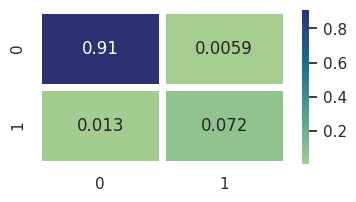

In [20]:
import seaborn as sns

revealer = confusion_matrix(cross_validation, ytrain)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidth = 5)

In [22]:
joblib.dump(log_reg, open('AfriCri.pkl', 'wb'))

**TESTING**

In [23]:
df = pd.read_csv('/content/African_crises_dataset.csv')
df.head(10)

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,no_crisis
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,no_crisis
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,no_crisis
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,no_crisis
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,no_crisis


In [24]:
sel_cols = ['exch_usd', 'inflation_annual_cpi', 'year', 'country_number', 'banking_crisis','country_code','systemic_crisis']
tester = df[sel_cols]
tester.head()

,exch_usd,inflation_annual_cpi,year,country_number,banking_crisis,country_code,systemic_crisis
0,0.052264,3.441456,1870,1,crisis,DZA,1
1,0.052798,14.149140,1871,1,no_crisis,DZA,0
2,0.052274,-3.718593,1872,1,no_crisis,DZA,0
3,0.051680,11.203897,1873,1,no_crisis,DZA,0
4,0.051308,-3.848561,1874,1,no_crisis,DZA,0


In [25]:
cust_df = tester.iloc[8, :-1]
cust_df = pd.DataFrame(cust_df).transpose()
cust_df

,exch_usd,inflation_annual_cpi,year,country_number,banking_crisis,country_code
8,0.051948,-1.492537,1878,1,no_crisis,DZA


In [26]:
inflate = joblib.load('/content/inflation_annual_cpi_scaling.pkl')
banking = joblib.load('/content/banking_crisis_encoder.pkl')
countryC = joblib.load('/content/country_code_encoder.pkl')
model = joblib.load('/content/AfriCri.pkl')

In [27]:
cust_df[['inflation_annual_cpi']] = inflate.transform(cust_df[['inflation_annual_cpi']])
cust_df['banking_crisis'] = banking.transform(cust_df['banking_crisis'])
cust_df['country_code'] = countryC.transform(cust_df['country_code'])

cust_df

,exch_usd,inflation_annual_cpi,year,country_number,banking_crisis,country_code
8,0.051948,-0.030871,1878,1,1,3


In [28]:
model.predict(cust_df)

array([0])